## HR Analytics Project

### Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

- HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

- Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
- Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Dataset Link-
- https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [1]:
## Importing the necessay Libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Importing the Dataset
df = pd.read_csv('HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##### Observation
- There are 1470 rows and 35 columns in the Dataset
- The feature 'Attrition' is our Dependent feature which needs to be predicted
- Other features are the Independent features which will used to predict the 'Attrition'
- Since the Output is either yes or no, The current problem is a Classification problem

In [3]:
df.shape

(1470, 35)

- We will begin with undestanding the Data through visualsation after Data cleaning

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Observation
- There are 26 columns which have Integer Datatype
- 9 colunms with Object Datatype
- There are no NULL Values according to info

- Lets have a final Check for NULL,Duplicate or Whitespaces in the Dataset

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.duplicated().any()

False

In [8]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

##### Observation
- There are no NULL Values Present
- There are no Duplicate Values or white spaces in the Dataset and we can proceed to Visualisaion

In [9]:
df.nunique().to_frame("Unique Values")

,Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


### Exploratory Data Analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


##### Observation 
- There seem to be '0's in the records which may mean that the employees may be new at work
- The data is only for Numerical Data 

In [11]:
## Dropping Irrelevant columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
df.shape

(1470, 31)

#### Seperating the features accroding to thier Datatypes

### Categorical Features

In [14]:
## Using List Comprehension to gather Categorical Features

Categorical_Feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [15]:
Categorical_Feature

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

- The Above 8 features are Categorical features

### Numerical features

In [16]:
## Using List Comprehension to include Datatypes other than Categorical Datatype

Numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
Numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

- The above features are Numerical features

### Data Visualisation

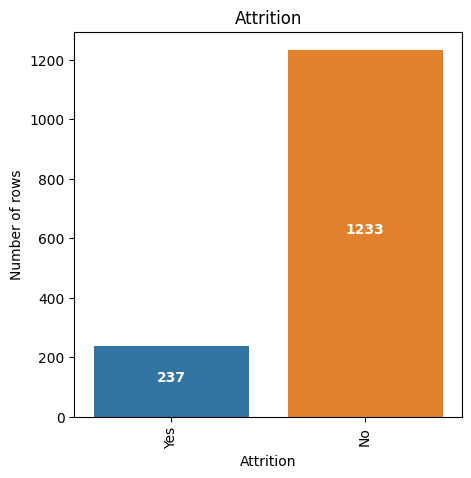

In [17]:
plt.figure(figsize=(5,5))
col_name = 'Attrition'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name])

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title('Attrition')
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

- We can see from the above Countplot that the Output feature are quite imbalanced

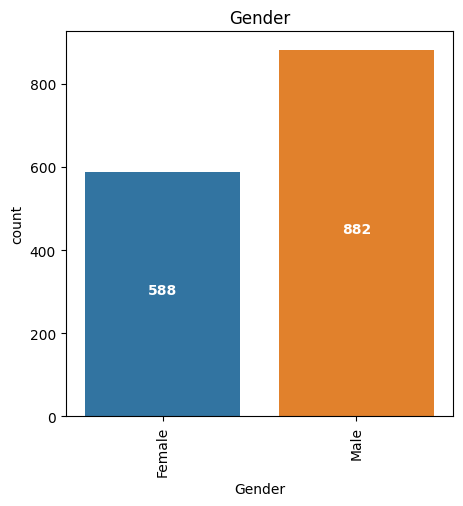

In [18]:
plt.figure(figsize=(5,5))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name])

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title('Gender')
plt.xticks(rotation=90)
plt.show()

- The number of Male Employees are higher than the Number of Female Employees

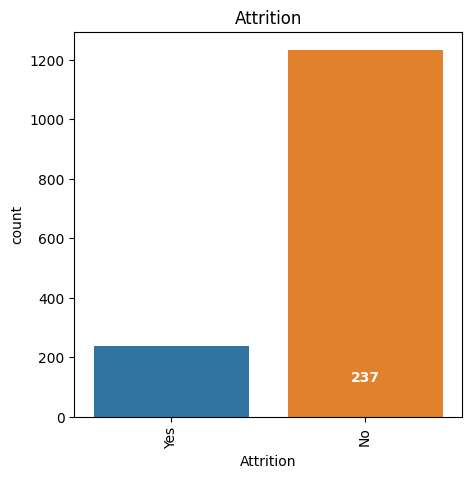

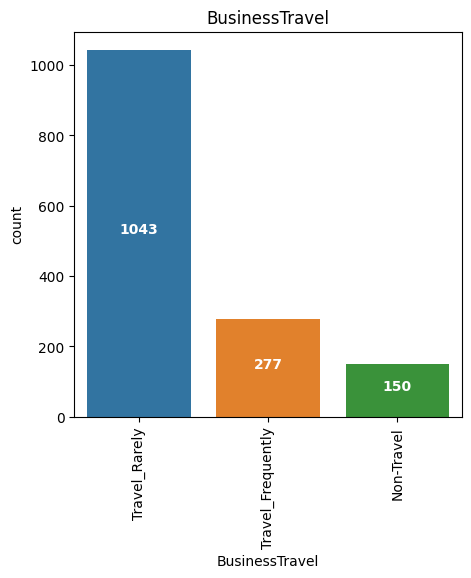

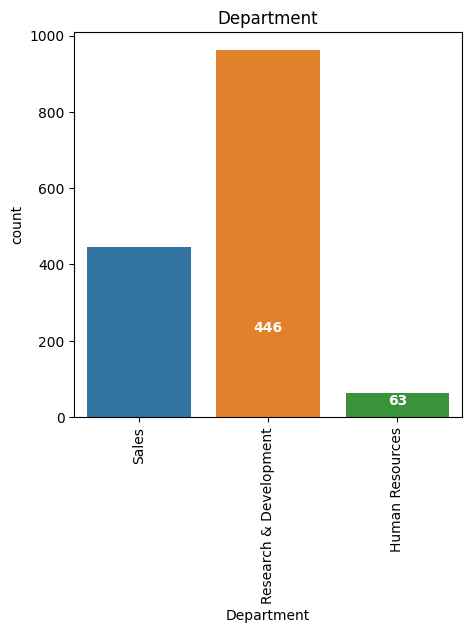

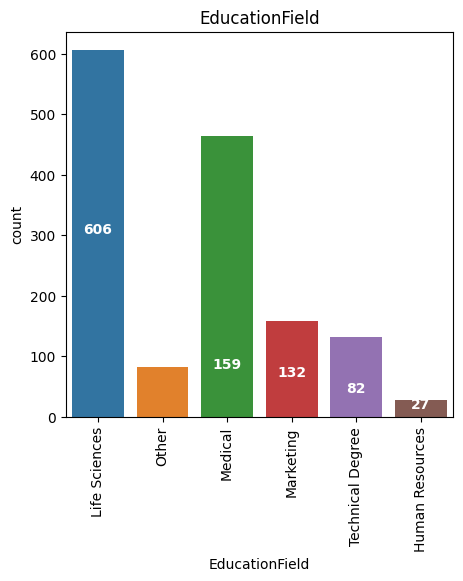

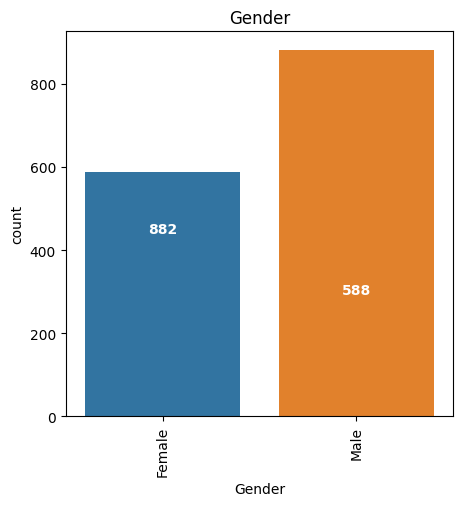

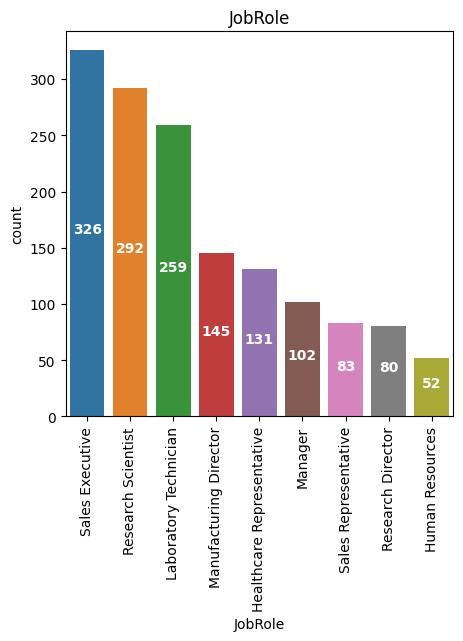

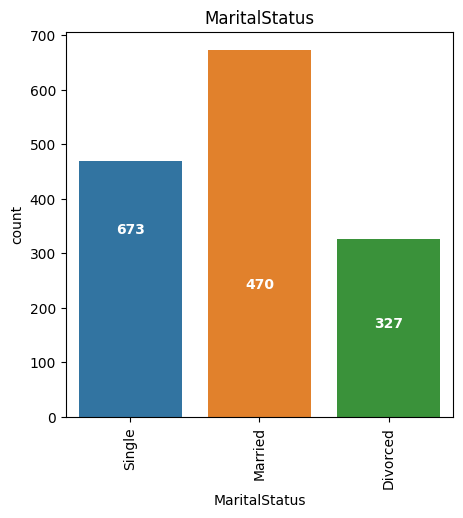

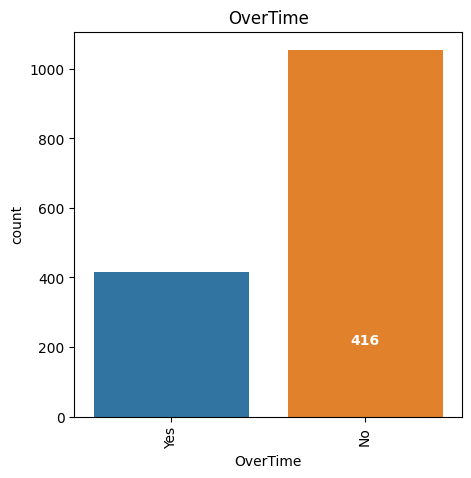

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# list of columns to plot
cols_to_plot = Categorical_Feature

# iterate over columns and plot countplot
for col in cols_to_plot:
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.countplot(data=df, x=col)
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for j, val in enumerate(df[col].value_counts().values):
        ax.text(j, val/2, val, ha="center", fontweight='bold', color='w')
    plt.show()


##### Observation
- Many Employees donot prefer to do Overtime in the company
- In the BusinessTravel column we see a majority of number in the Travel_Rarely value while Non_Travel are the least of them.
- The Department column has lots of values for R&D department however the least number of employees are in HR.
- The Number of Married Employees is the Highest while the Number of Divorced Employees are the Lowest
- The employees are majorly educated in Life Sciences and the least from HR.
- In Job Role Column highest number is found in sales executive designation and lowest number of HR roles.

- Lets have a look at Numerical Featuers

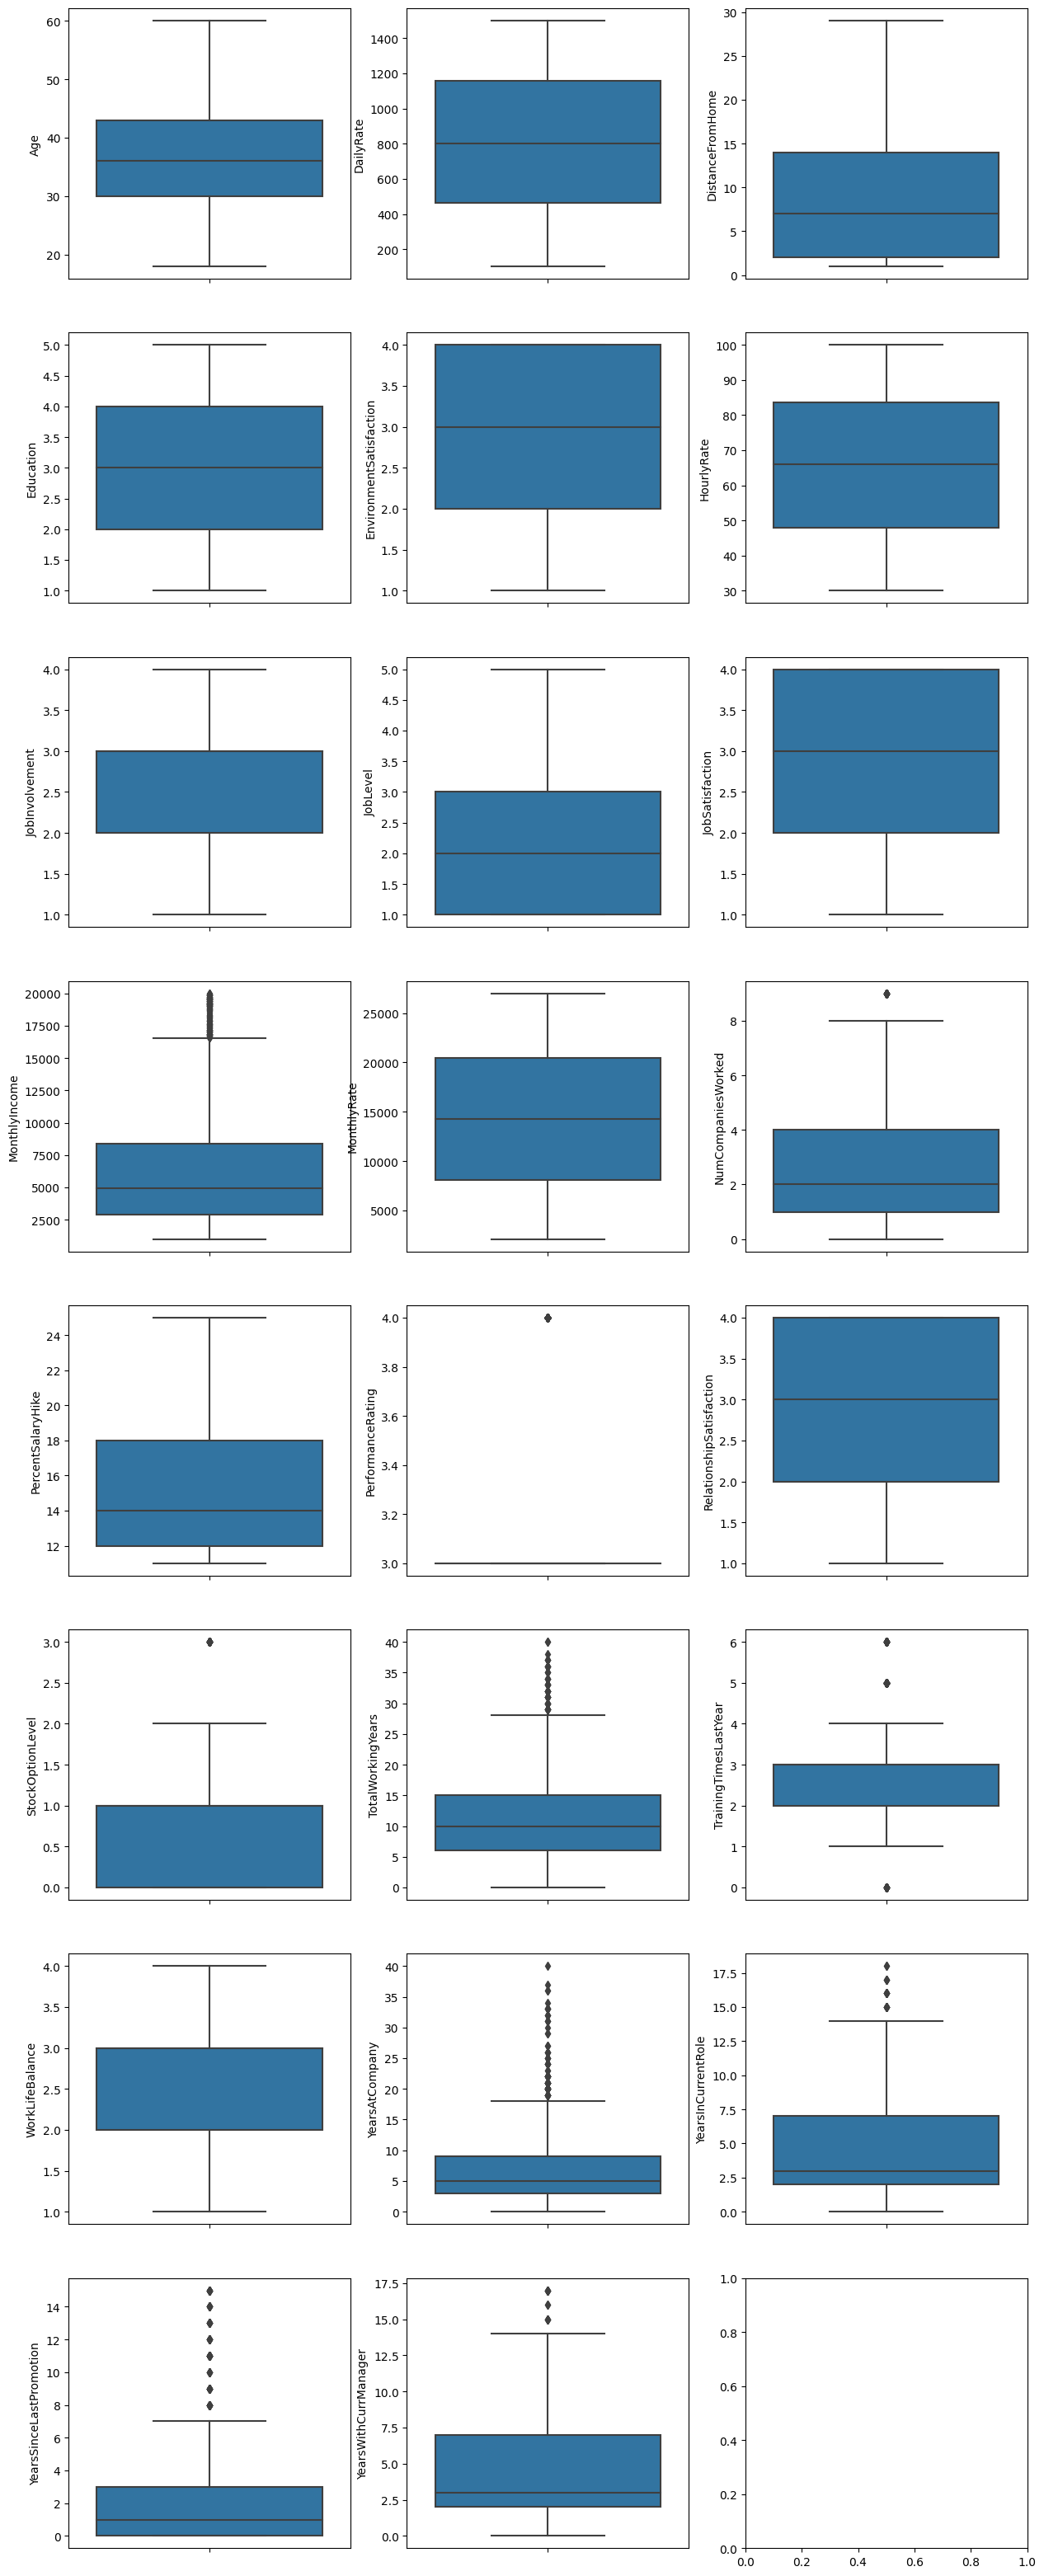

In [20]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,40))
index = 0
ax = ax.flatten()
for col, value in df[Numerical_features].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.show()

##### Observation
The columns below have presence of Outliers in them
- MonthlyIncome
- NumCompaniesWorked
- PerformanceRating
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

#### We will go ahead and check the Distribution of Numerical features

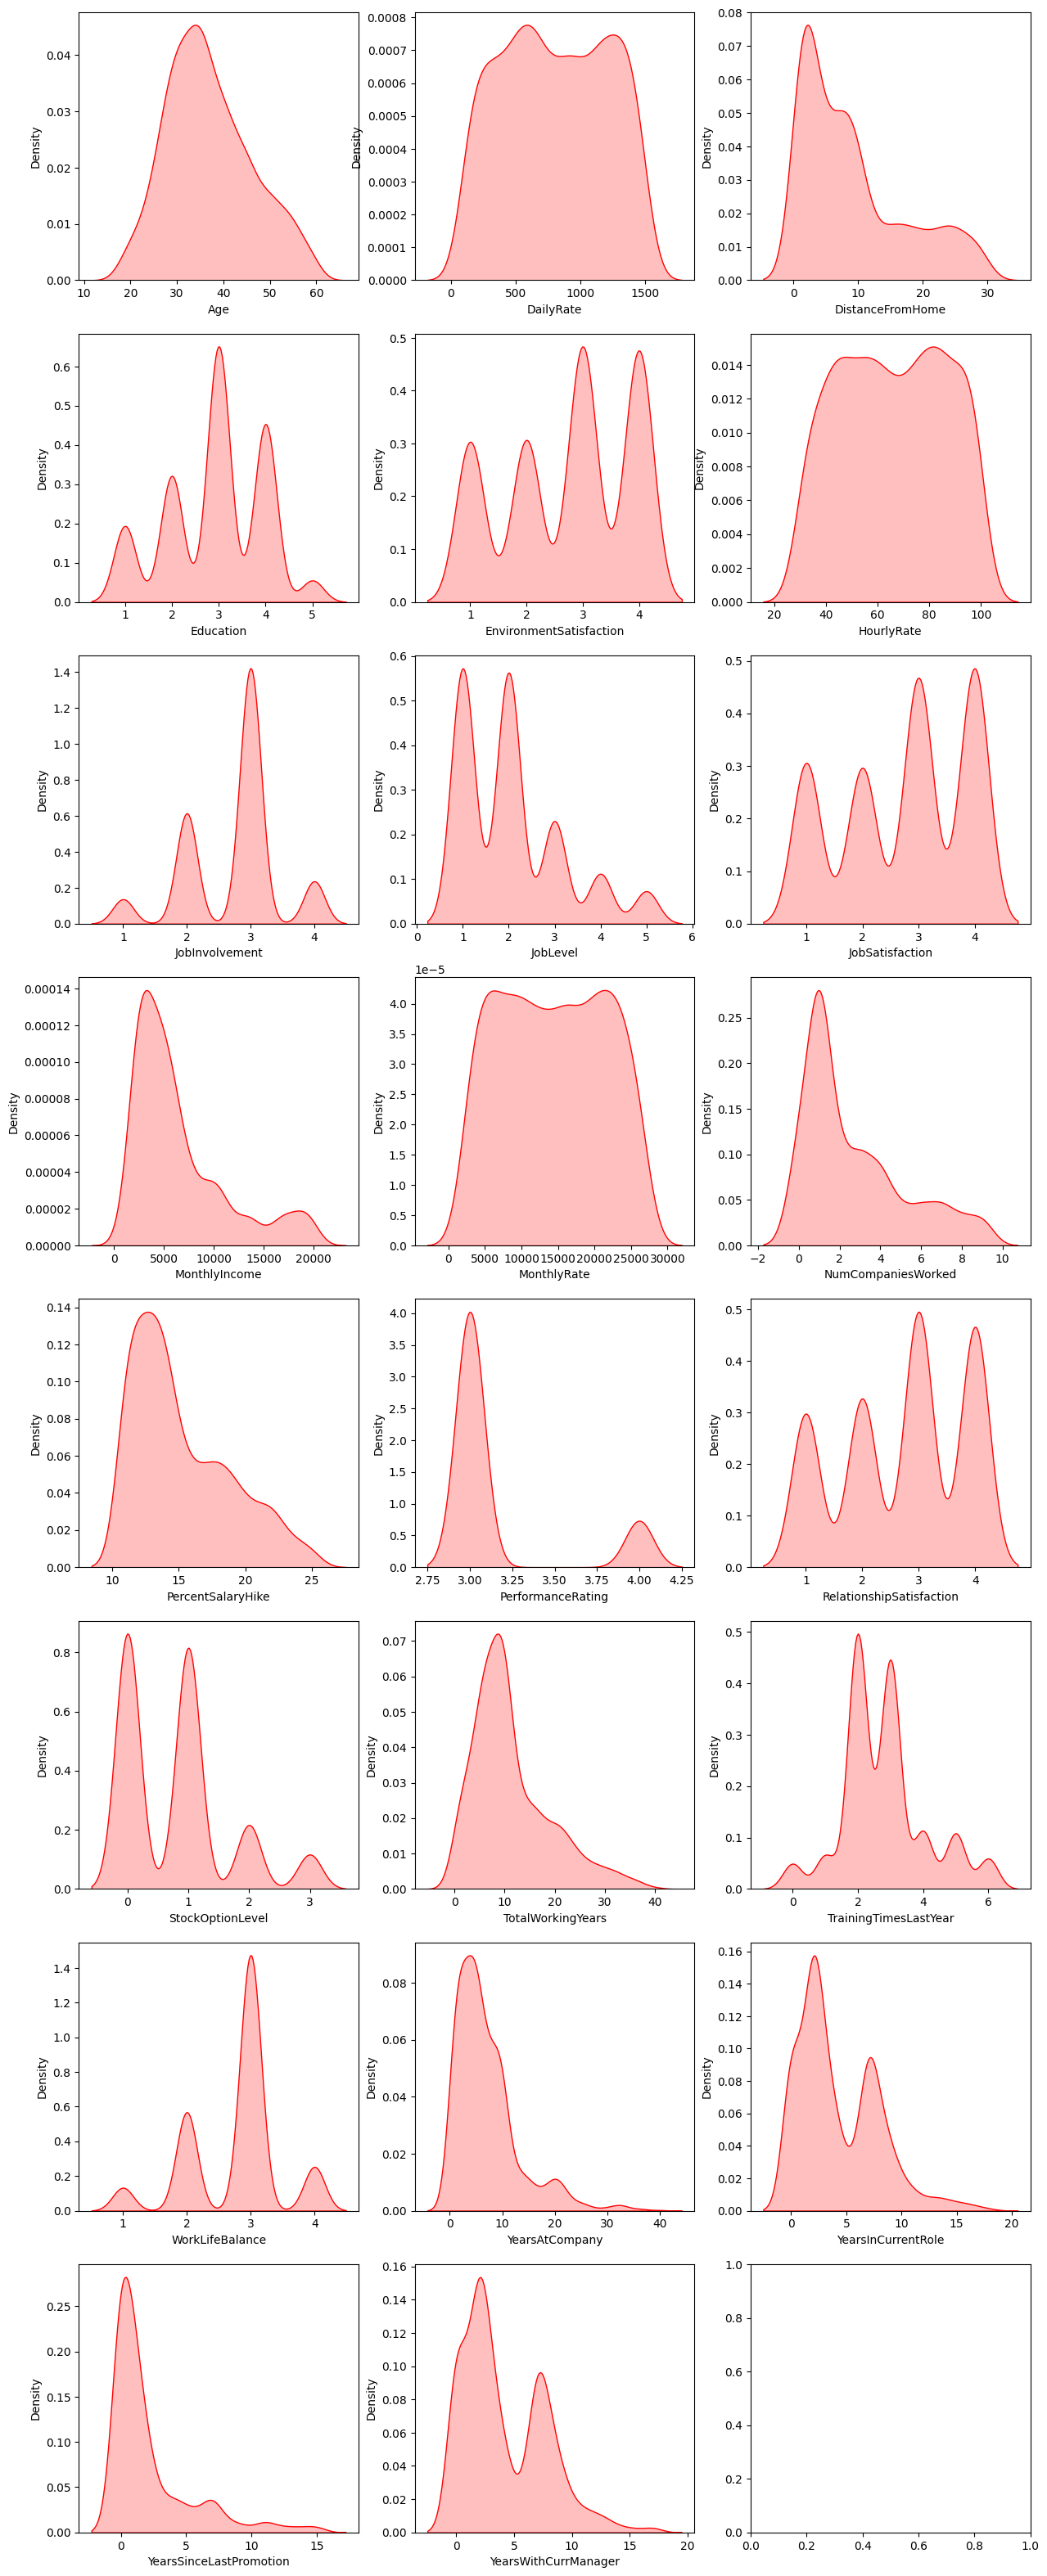

In [21]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,40))
index = 0
ax = ax.flatten()
for col, value in df[Numerical_features].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

##### Observation:
Form the above Analysis we can see that the following columns have Skewness:
- DistanceFromHome
- MonthlyIncome
- NumCompaniesWorked
- PercentSalaryHike
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

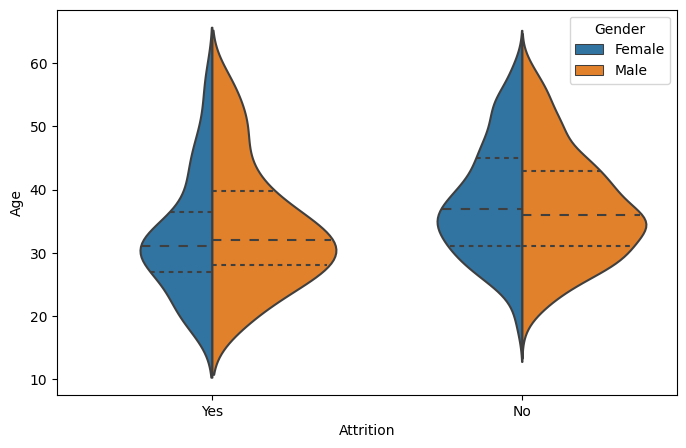

In [22]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
                split=True, scale="count", inner="quartile")
plt.show()

- The Age group of 20's and 30's in both male and female have High Attrition Counts

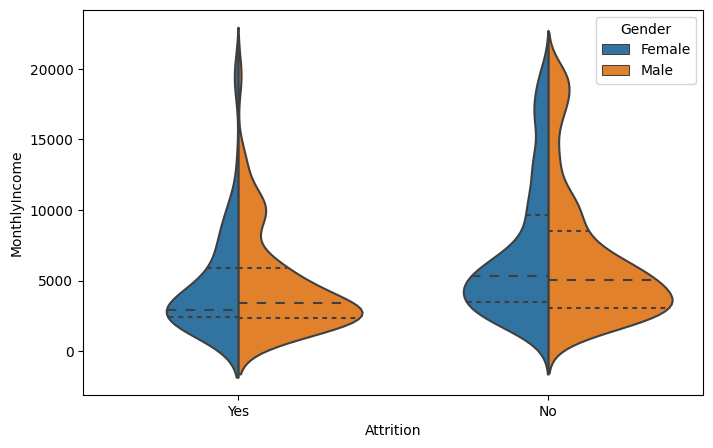

In [23]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
               split=True, scale="count", inner="quartile")
plt.show()

- Attrition is High for both male and female employees when the monthly income is less than 5000.

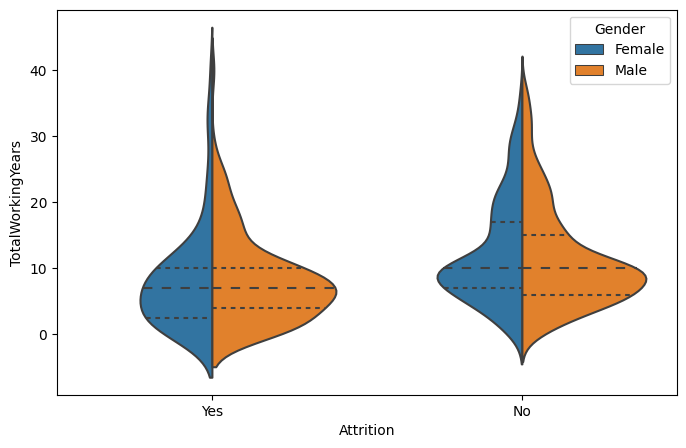

In [24]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
               split=True, scale="count", inner="quartile")
plt.show()

- Attrition for both male ad female employees occur when they are in their experience range of 1-10 years

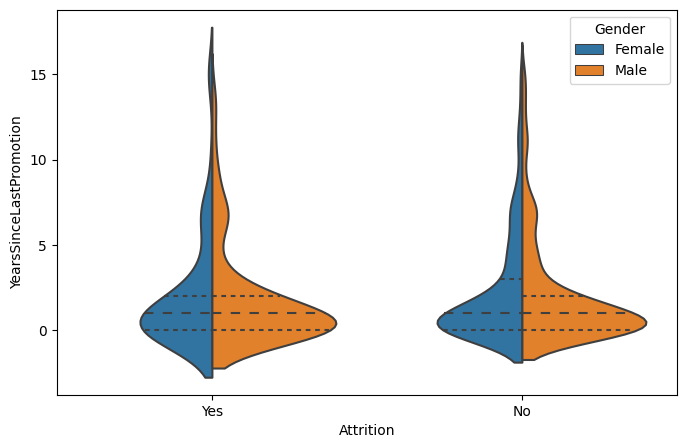

In [25]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, 
               split=True, scale="count", inner="quartile")
plt.show()

- Attrition is higher for employees who have not been promoted despite having 5 years of Experience

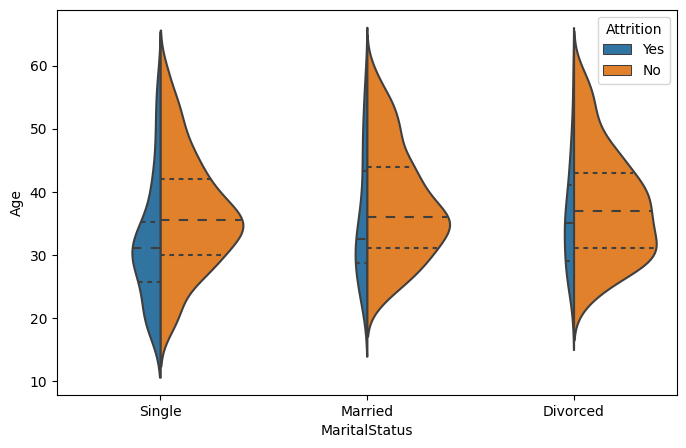

In [26]:
plt.figure(figsize=(8,5))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
                split=True, scale="count", inner="quartile")
plt.show()

- Attrition is less for married or divorced employees

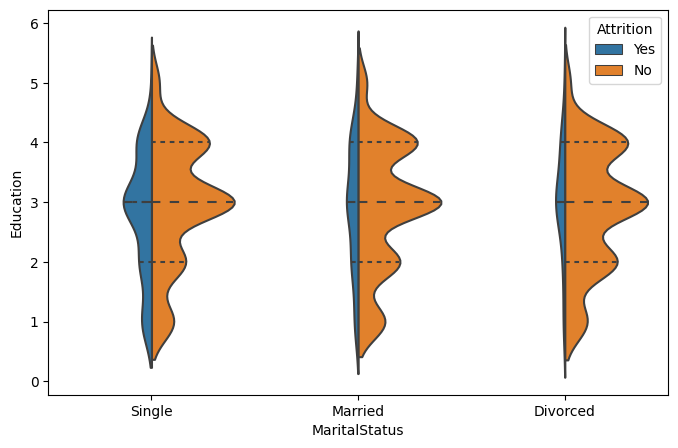

In [27]:
plt.figure(figsize=(8,5))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, 
               split=True, scale="count", inner="quartile")
plt.show()

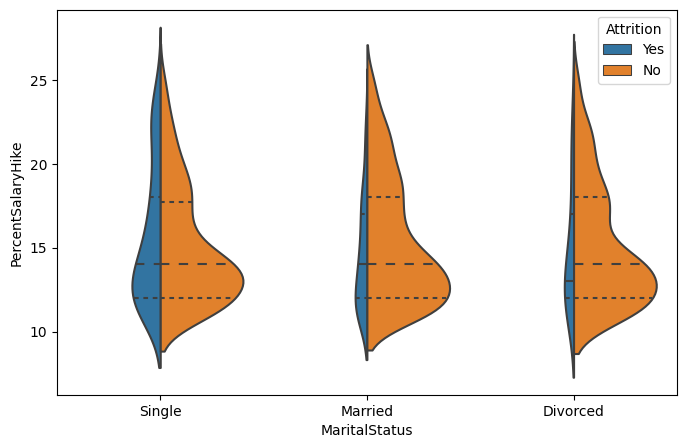

In [28]:
plt.figure(figsize=(8,5))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df, 
                split=True, scale="count", inner="quartile")
plt.show()

- Salary Hike plays a major role when it come to Attrition amongst the Singles as comapred to their married or divorced

### Feature Engineering

#### Encoding the Categorical Features

In [29]:
## Importing Libraries for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

le = LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

- Label Encoder is used on Output FEature

In [30]:
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


- In the Output feature 0 shows 'Yes' and 1 shows 'NO'

In [31]:
Encoder = OrdinalEncoder()
df['BusinessTravel'] = Encoder.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = Encoder.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = Encoder.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = Encoder.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = Encoder.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = Encoder.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = Encoder.fit_transform(df['OverTime'].values.reshape(-1,1))

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


- The above Data is ready to used for training in the ML models

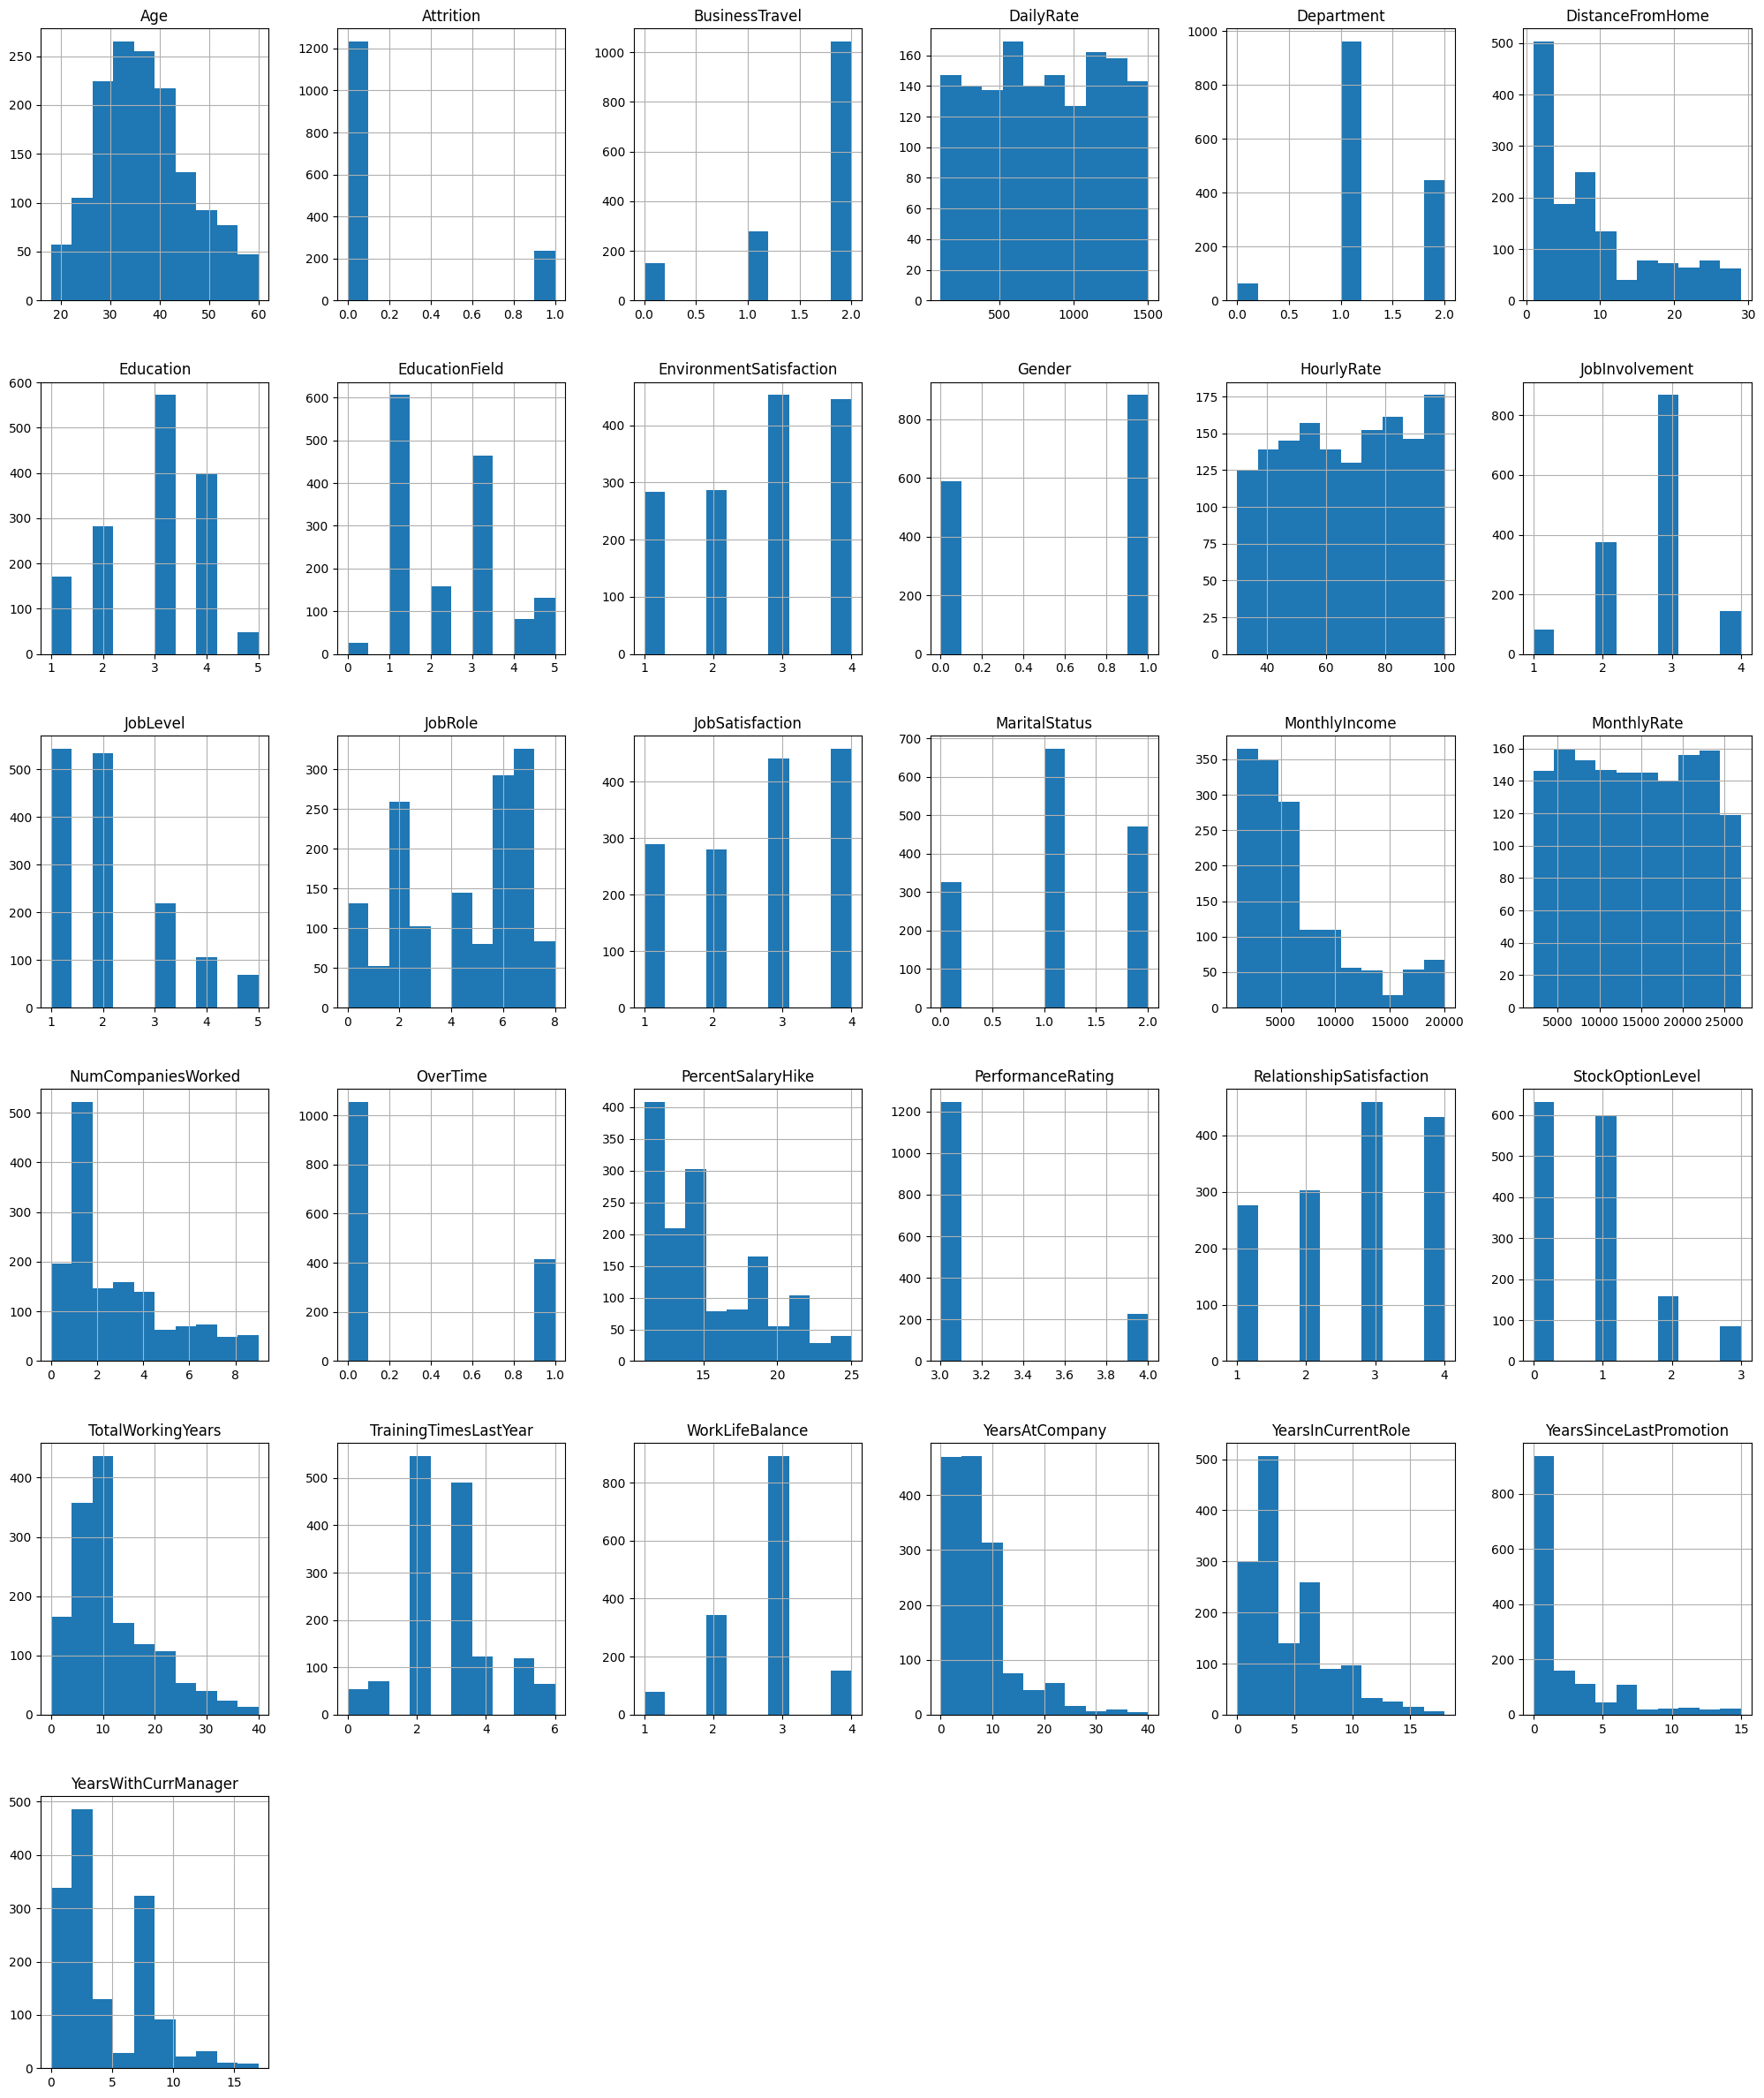

In [33]:
df.hist(figsize=(25,30))
plt.show()

#### Correlation

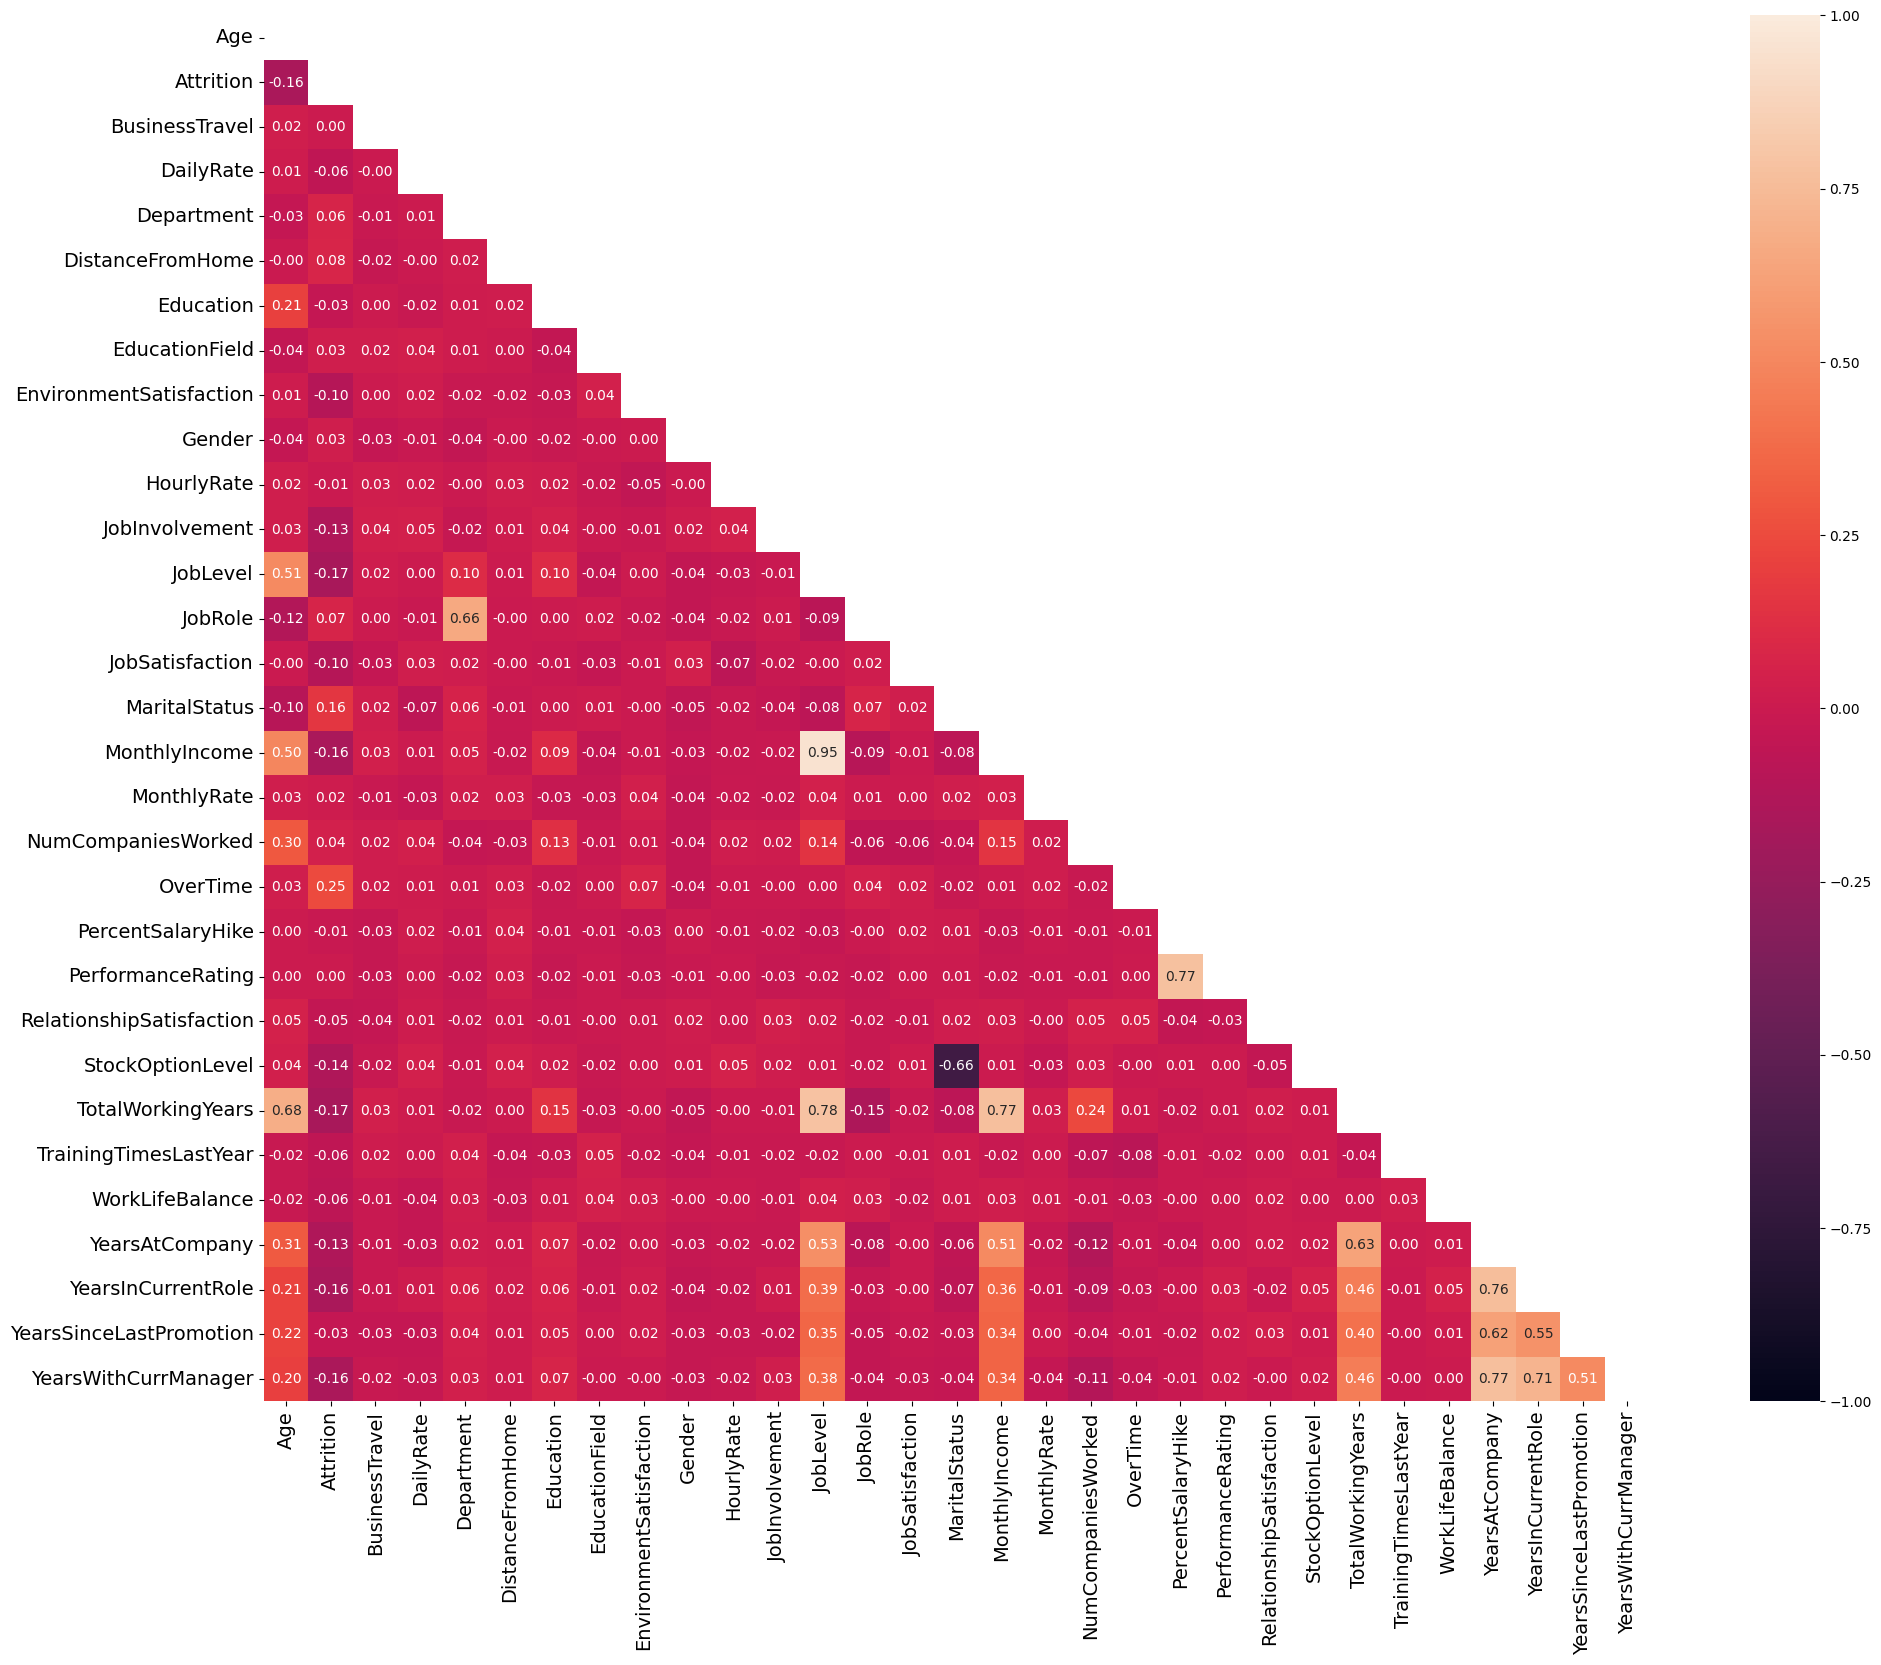

In [34]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':10}, mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### Observation
- Very Less Multi collinearity in the Dataset

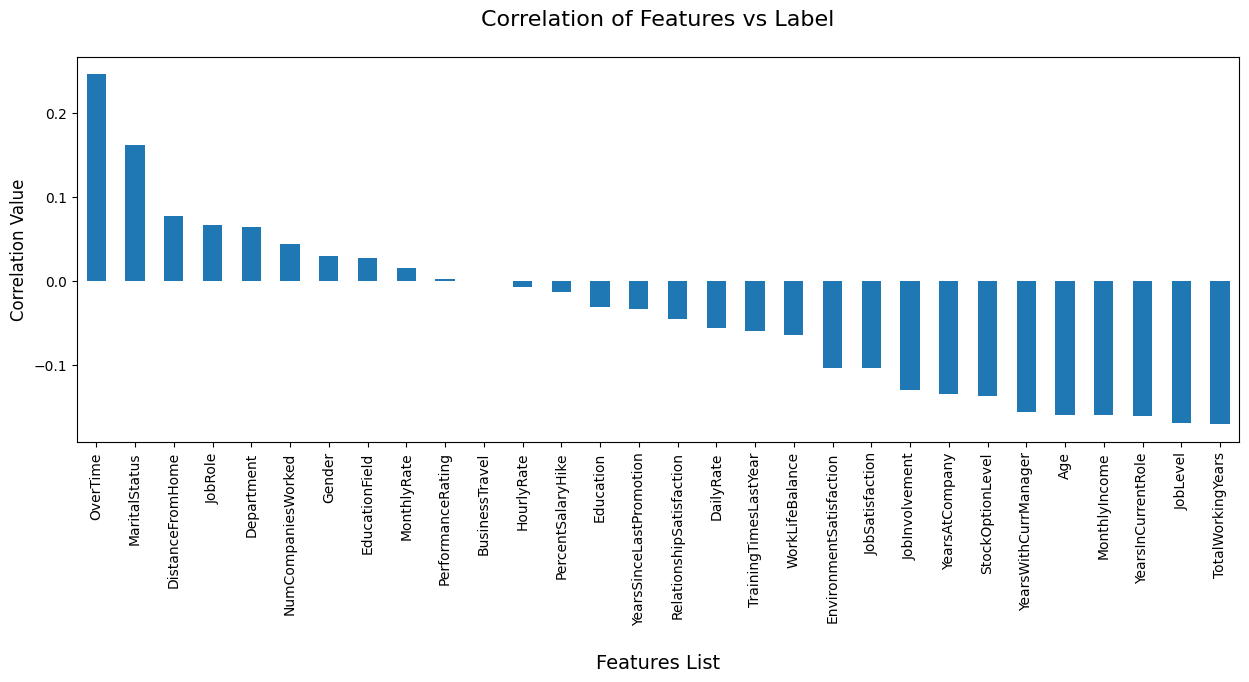

In [35]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- The above graph shows the features which are positively and negatively correlated with Output feature

### Outlier Treatment

In [36]:
from scipy.stats import zscore
threshold = 3
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss:  5.646258503401361


- The Data Loss after Outlier removal is only 5.64% which is within acceptable range

Lets Visualize the Data after remvoing the Outliers

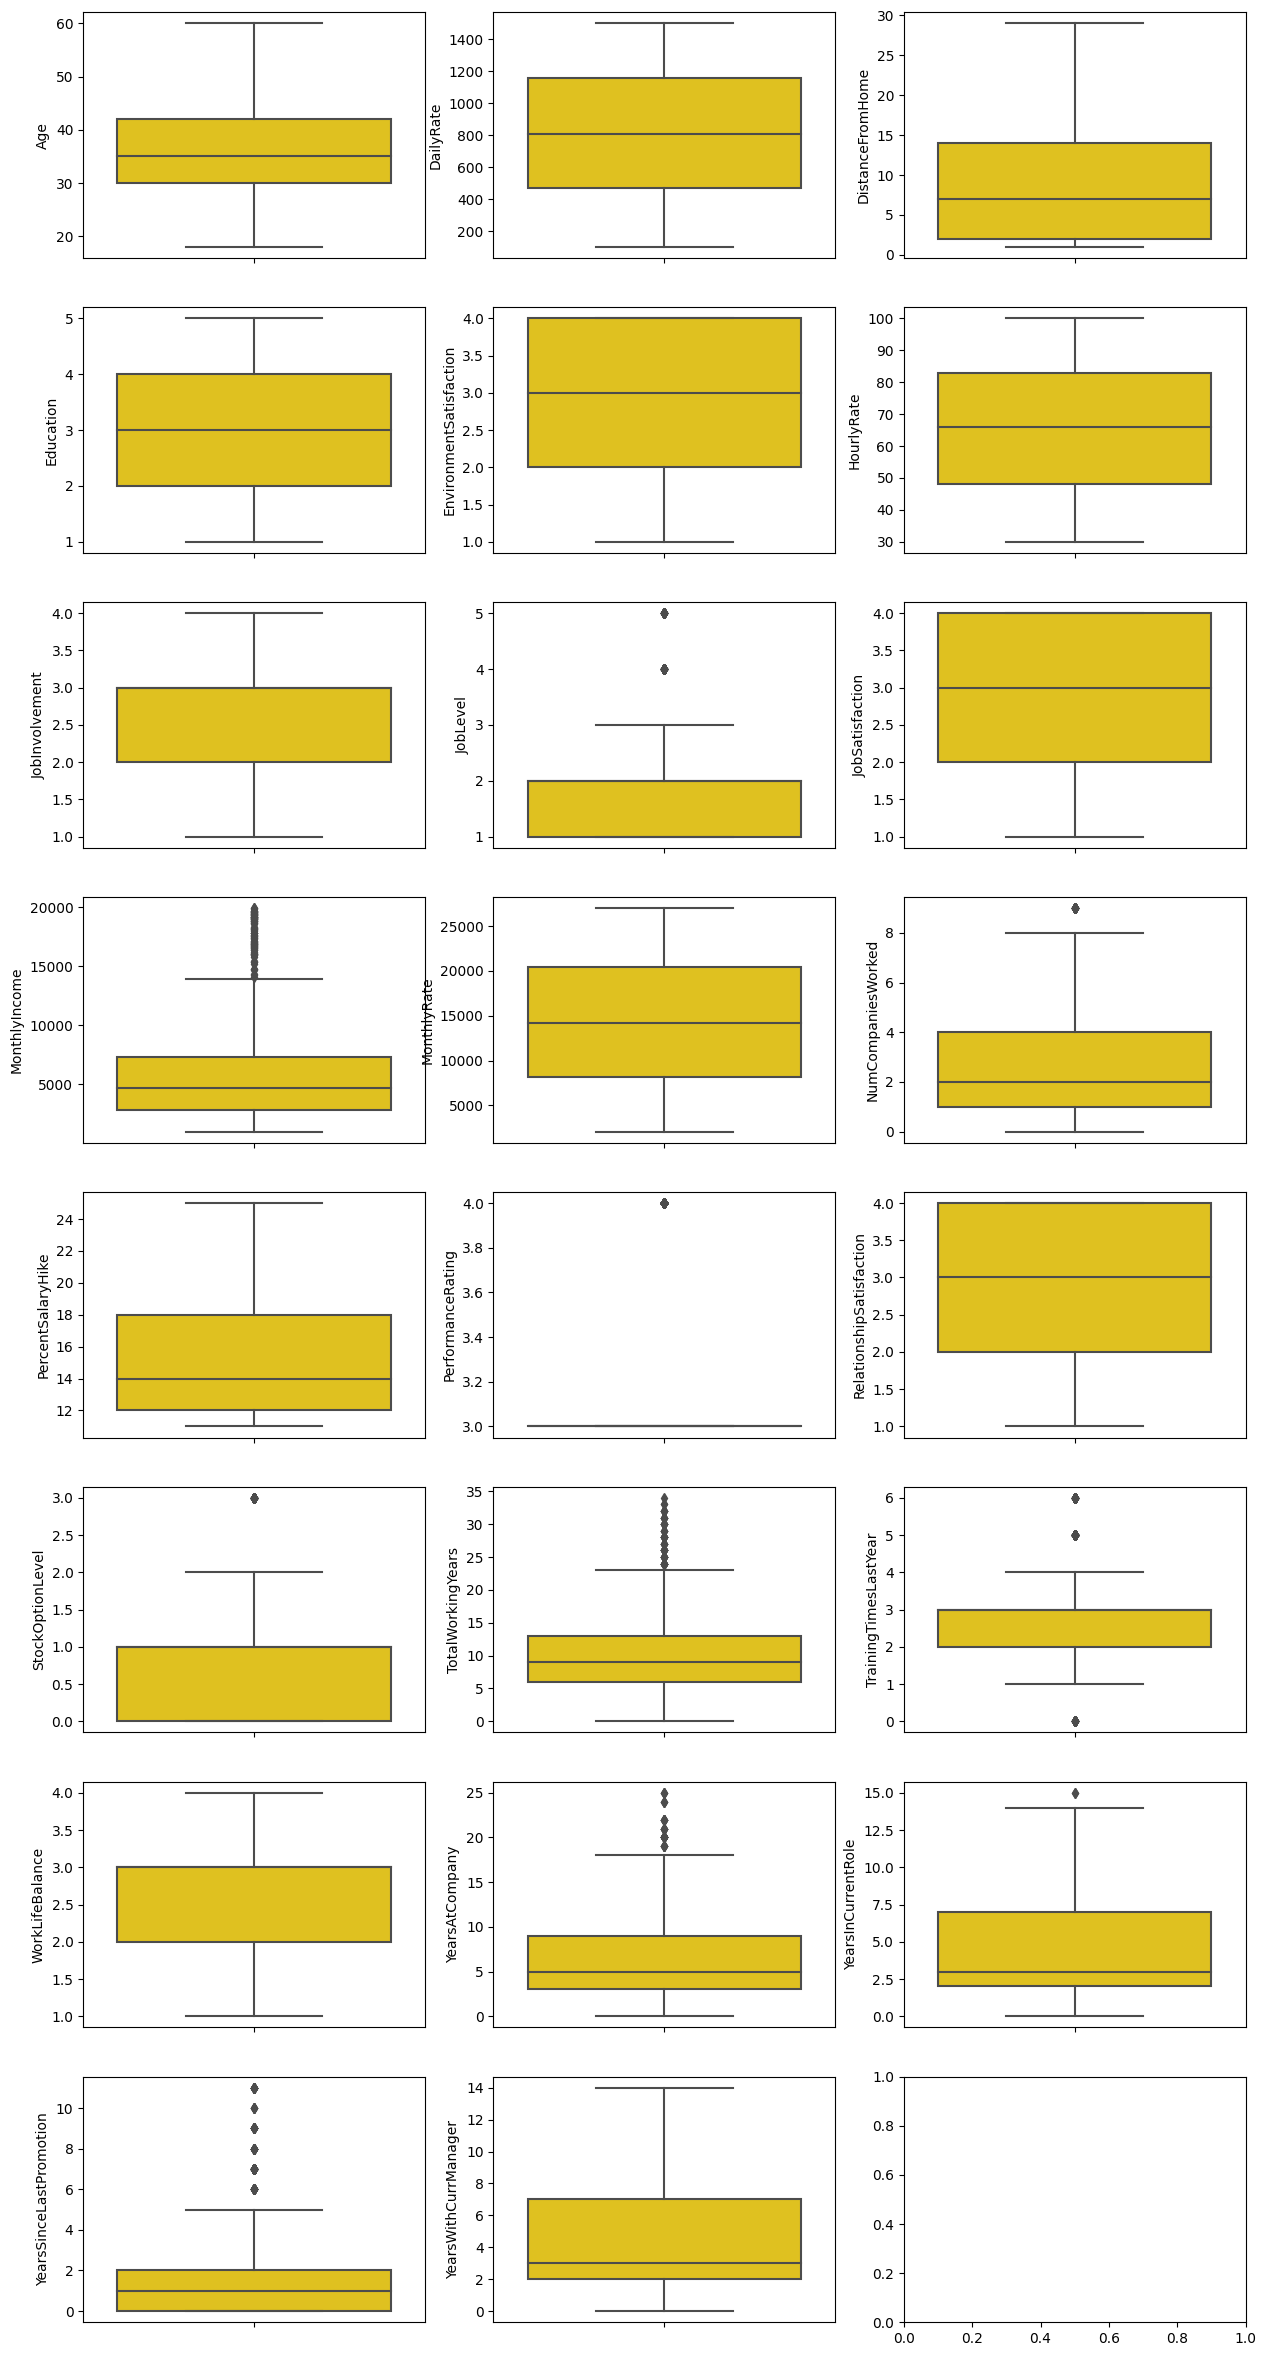

In [37]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,30))
index = 0
ax = ax.flatten()
for col, value in df[Numerical_features].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="prism")
    index += 1
plt.show()

- The presence of Outliers is removed as much as possible and further removal will lead to more Data Loss which is acceptable

Lets check the Skewness

In [38]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

- There are many features with High skewness so we will use Log Transform method to remove it

In [39]:
for col in Numerical_features:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

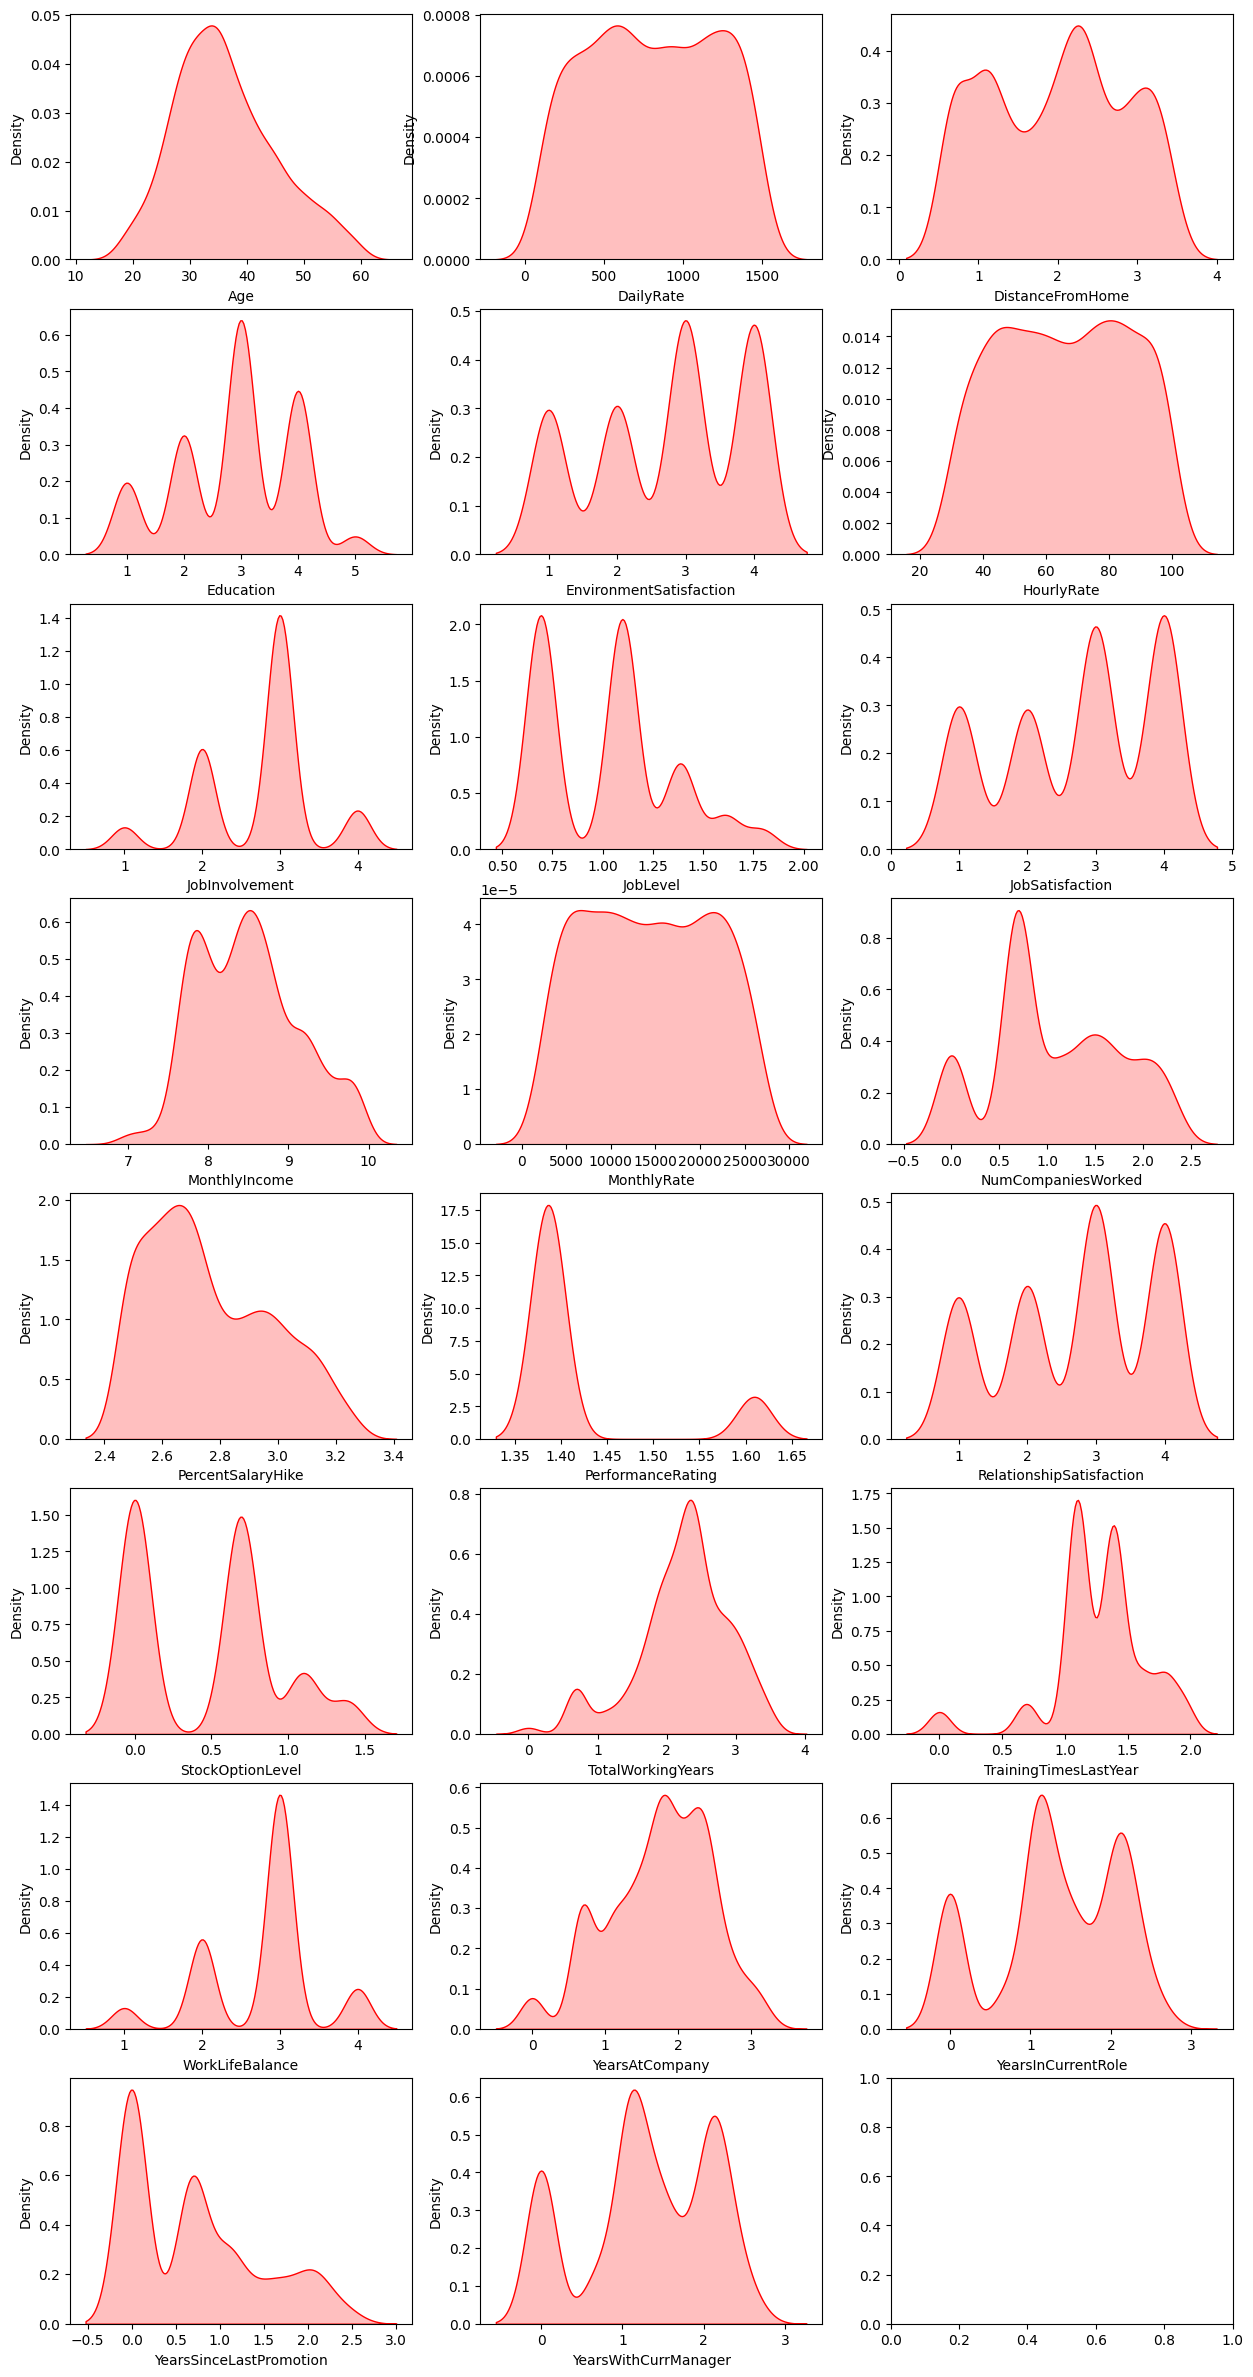

In [40]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,30))
index = 0
ax = ax.flatten()
for col, value in df[Numerical_features].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

- We have removed as much skewness as possible

### Splitting the Dataset

In [41]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [42]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,0.693147,2,1.0,2,0.0,94,3,1.098612,7.0,4,2.0,8.698514,19479,2.197225,1.0,2.484907,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1.0,279,1.0,2.197225,1,1.0,3,1.0,61,2,1.098612,6.0,2,1.0,8.543056,24907,0.693147,0.0,3.178054,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,2.0,1373,1.0,1.098612,2,4.0,4,1.0,92,2,0.693147,2.0,3,2.0,7.645398,2396,1.945910,1.0,2.772589,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,1.0,1392,1.0,1.386294,4,1.0,4,0.0,56,3,0.693147,6.0,3,1.0,7.975908,23159,0.693147,1.0,2.484907,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,2.0,591,1.0,1.098612,1,3.0,1,1.0,40,3,0.693147,2.0,2,1.0,8.151622,16632,2.302585,0.0,2.564949,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612


In [43]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

### Handling the Imbalanced Data

In [44]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

- We will Use Oversampling Method to Balance the Dataset using SMOTE Technique

In [45]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [46]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

- The Dataset is now perfectly Balanced

#### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.727367,0.667626,0.827532,1.369544,-1.682438,-0.751283,-1.008241,-0.404471,-1.377615,1.495980,0.640675,0.408692,0.983371,1.401083,1.116763,0.516669,0.718140,1.739622,1.354525,-1.336602,-0.460168,-1.445396,-0.933396,0.168236,-3.504522,-2.099463,0.495117,0.555952,-0.992766,0.821364
1,1.651881,-0.999461,-1.286619,-0.609004,0.198797,-1.782071,-1.008241,0.522092,0.828672,-0.257943,-0.714397,0.408692,0.558458,-0.451033,-0.325299,0.255182,1.490351,-0.664924,-0.861844,2.069603,2.504481,1.422283,0.680929,0.461402,0.367015,0.578046,1.148070,1.183450,0.005291,1.198913
2,0.265109,0.667626,1.523686,-0.609004,-1.175299,-0.751283,1.366720,1.448655,0.828672,1.389682,-0.714397,-0.974753,-1.141194,0.475025,1.116763,-1.254713,-1.712162,1.337849,1.354525,0.077101,-0.460168,-0.489503,-0.933396,-0.003837,0.367015,0.578046,-2.316010,-1.592797,-0.992766,-1.530106
3,-0.197148,-0.999461,1.572494,-0.609004,-0.815479,1.310294,-1.008241,1.448655,-1.377615,-0.523689,0.640675,-0.974753,0.558458,0.475025,-0.325299,-0.698782,1.241673,-0.664924,1.354525,-1.336602,-0.460168,0.466390,-0.933396,0.168236,0.367015,0.578046,0.858175,1.183450,1.003348,-1.530106
4,-0.890534,0.667626,-0.485143,-0.609004,-1.175299,-1.782071,0.575066,-1.331034,0.828672,-1.374077,0.640675,-0.974753,-1.141194,-0.451033,-0.325299,-0.403225,0.313113,1.908060,-0.861844,-0.943263,-0.460168,1.422283,0.680929,-0.198917,0.367015,0.578046,-0.728917,-0.126048,0.589117,-0.088309


In [48]:
## Importing ML Algortihms and Performance Metrics , GridSearch and Cross Validation for Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Train Test Split and Finding the best random state for the models

In [49]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc_score = (accuracy_score(y_test, y_pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"for Random State", maxRS)

Best accuracy score is 89.4396551724138 for Random State 75


- Accroding to above predictions the best random state is 895

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=895)

- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'Attrition'
- The function will Calculate accuracy score, generating the classification report, the Cross-Validation score and in the end it will Calculate the Difference between the accuracy score and cross validation score.

In [51]:
def Attriton(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=895)    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    y_pred = model.predict(X_test)
    
    # Accuracy Score
    accuracy = (accuracy_score(y_test, y_pred))*100
    print("Accuracy Score:", accuracy)
    
    # Classification Report
    Report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", Report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

#### Logistic Regression

In [52]:
model = LogisticRegression()
Attriton(model, X, y)

Accuracy Score: 88.57758620689656

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       233
           1       0.93      0.84      0.88       231

    accuracy                           0.89       464
   macro avg       0.89      0.89      0.89       464
weighted avg       0.89      0.89      0.89       464

Cross Validation Score: 85.23665003351455

Accuracy Score - Cross Validation Score is -0.10733968868696309


#### Support Vector Classifier

In [53]:
model = SVC()
Attriton(model, X, y)

Accuracy Score: 91.16379310344827

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       233
           1       0.93      0.89      0.91       231

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       0.91      0.91      0.91       464

Cross Validation Score: 90.68015938035302

Accuracy Score - Cross Validation Score is -5.550849035525431


#### Decision Tree Classifier

In [54]:
model = DecisionTreeClassifier()
Attriton(model, X, y)

Accuracy Score: 84.91379310344827

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       233
           1       0.86      0.84      0.85       231

    accuracy                           0.85       464
   macro avg       0.85      0.85      0.85       464
weighted avg       0.85      0.85      0.85       464

Cross Validation Score: 83.81917032844267

Accuracy Score - Cross Validation Score is 1.3101400163849206


#### Random Forest Classifier

In [55]:
model = RandomForestClassifier()
Attriton(model, X, y)

Accuracy Score: 92.02586206896551

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       233
           1       0.98      0.85      0.91       231

    accuracy                           0.92       464
   macro avg       0.93      0.92      0.92       464
weighted avg       0.93      0.92      0.92       464

Cross Validation Score: 90.64245550011171

Accuracy Score - Cross Validation Score is -5.513145155284121


#### K Neighbors Classifier

In [56]:
model = KNeighborsClassifier()
Attriton(model, X, y)

Accuracy Score: 83.62068965517241

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81       233
           1       0.76      0.98      0.86       231

    accuracy                           0.84       464
   macro avg       0.87      0.84      0.83       464
weighted avg       0.87      0.84      0.83       464

Cross Validation Score: 82.21140239815297

Accuracy Score - Cross Validation Score is 2.9179079466746174


#### Extra Trees Classifier

In [57]:
model = ExtraTreesClassifier()
Attriton(model, X, y)

Accuracy Score: 93.96551724137932

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       233
           1       0.97      0.90      0.94       231

    accuracy                           0.94       464
   macro avg       0.94      0.94      0.94       464
weighted avg       0.94      0.94      0.94       464

Cross Validation Score: 93.96049005734713

Accuracy Score - Cross Validation Score is -8.831179712519543


#### Since the Cross Val score of Decision Tree Classifier is 0.02 we will choose that as out Best model

In [58]:
parameters = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4, 5],
              'max_depth' : [2, 4, 6, 8, 10],
              'random_state' : [42, 100, 200, 591, 700]
             }

In [59]:
Grid_Search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
Grid_Search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'random_state': [42, 100, 200, 591, 700],
                         'splitter': ['best', 'random']})

In [60]:
Grid_Search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 2,
 'random_state': 700,
 'splitter': 'best'}

In [61]:
Grid_Search.best_score_

0.8623166023166023

### Final Model

In [62]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split=4, 
                                     random_state=700, splitter="best")
Classifier = Final_Model.fit(X_train, y_train)
final_pred = Final_Model.predict(X_test)
final_accuracy = (accuracy_score(y_test, final_pred))*100
print("Accuracy score for the Best Model is:", final_accuracy)

Accuracy score for the Best Model is: 86.20689655172413


### AUC ROC Curve

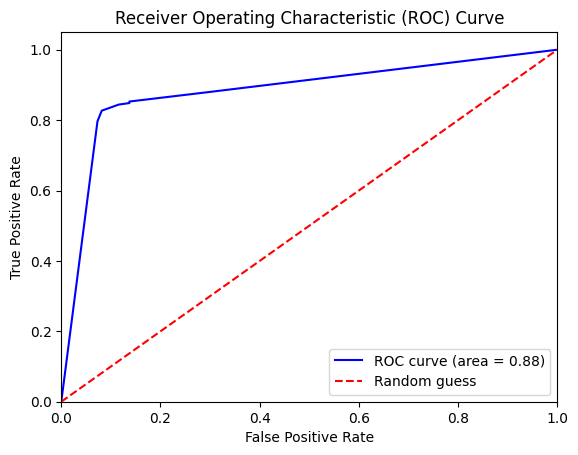

In [63]:
from sklearn.metrics import roc_curve, auc

probs = Final_Model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

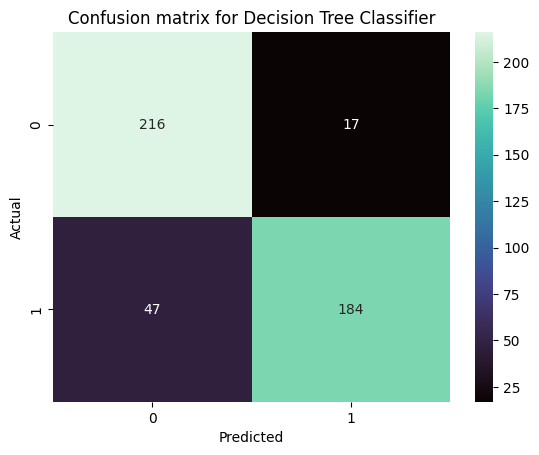

In [66]:
from sklearn.metrics import confusion_matrix

y_pred = Final_Model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Saving the model

In [68]:
import joblib
filename = "Attrition_final.pkl"
joblib.dump(Final_Model, filename)

['Attrition_final.pkl']